# Topic 2. Neural Networks 
## Mathematical background

Credit: The examples and exercises used in this lab are use element from exercises and examples presented in:
        https://github.com/hamarex/tensorflow/blob/master/jupyter_tfbook/Chapter02/Maximum%20likelihood%20estimation%20example.ipynb

We import all the libraries required for the exercises

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [3]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import binarize
from sklearn.preprocessing import MinMaxScaler

We will use the Parkinsons Telemonitoring Data Set available from https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/
    
    This dataset contains 16 biomedical voice measurements from 42 people with early-stage Parkinson's disease. 
    
    The main aim of the data is to predict the motor and total UPDRS scores ('motor_UPDRS' and 'total_UPDRS') from the 16 voice measures. 

    This can be seen as a regression problem. 

In [4]:
# The dataset is read
df = pd.read_csv('parkinsons_updrs.data')

# The columns of the dataset are printed. These columns include the features and 
# the target variables 'motor_UPDRS' and 'total_UPDRS') 
print(df.columns)

# There are 42 subjects. We will use data for the first one
indices_subject_1 = df['subject#']==1

# Records of subject_1
df_subject_1 = df[indices_subject_1]

# Records of the dataframe are transformed to a matrix and we print its shape
data = df_subject_1.values
print('The shape of the matrix is ',data.shape)

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')
The shape of the matrix is  (149, 22)


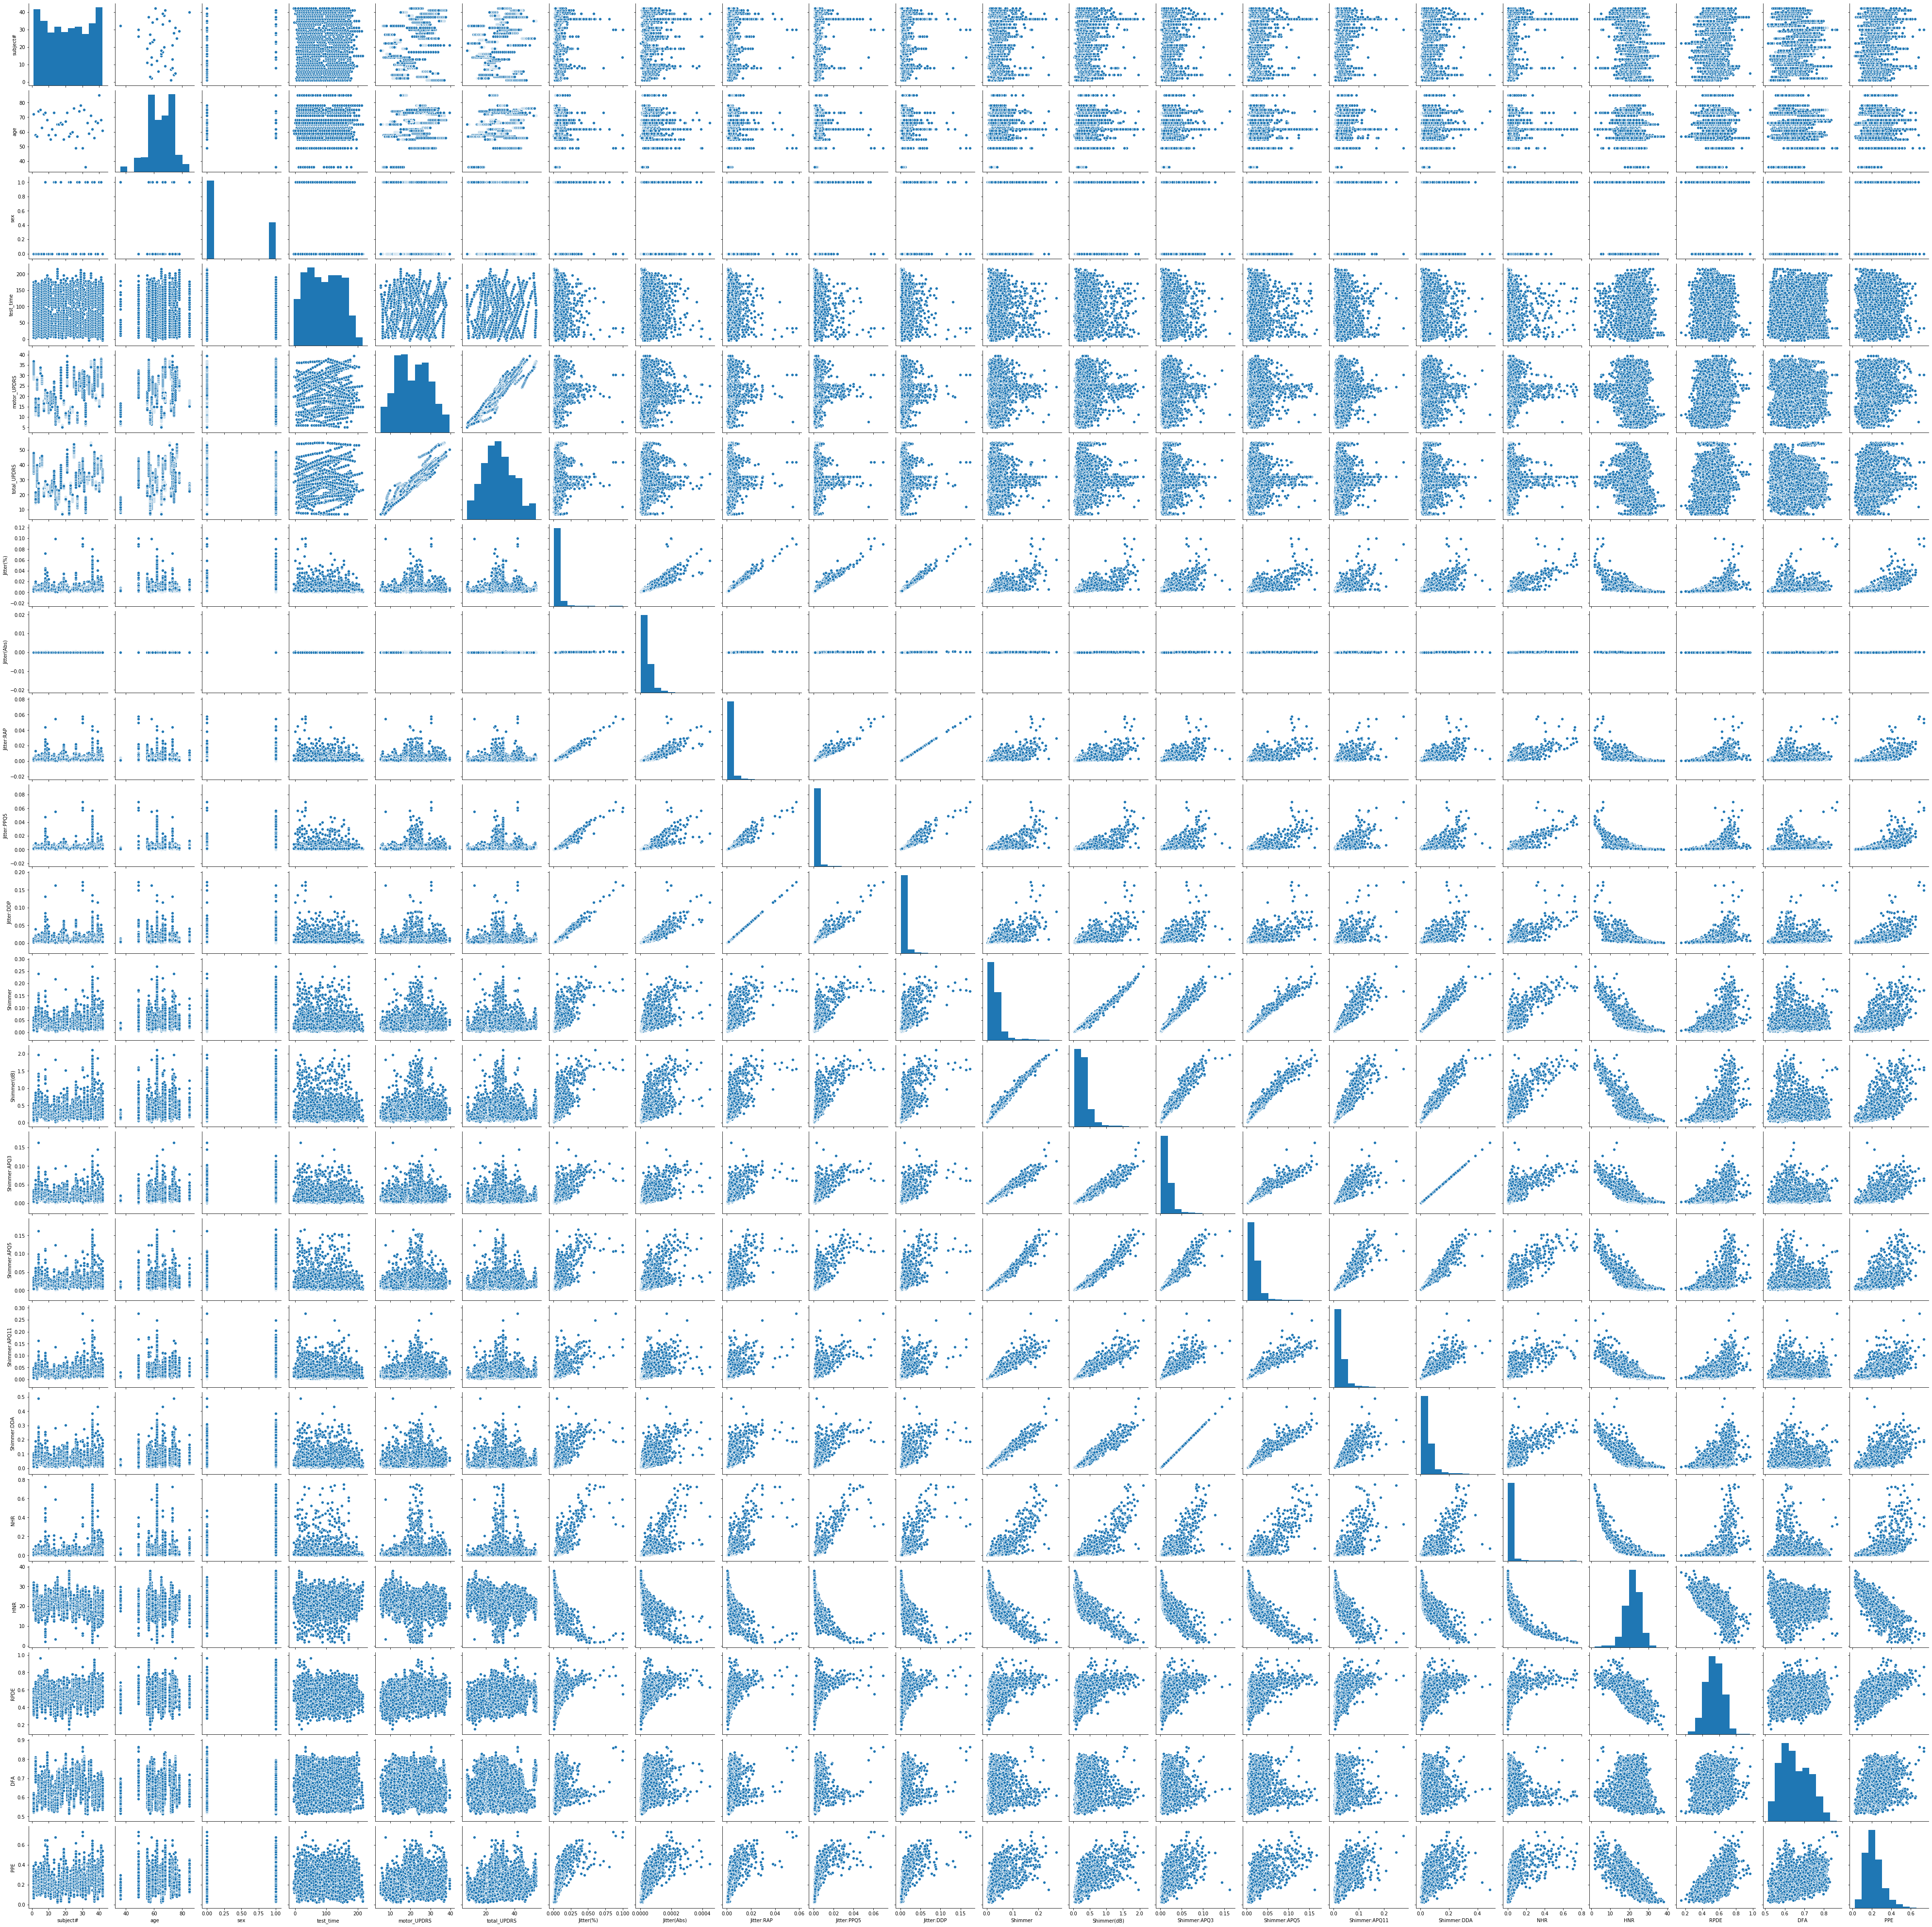

In [6]:
# We visualize the relationships between variables in the dataset using seaborn
sns.pairplot(df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


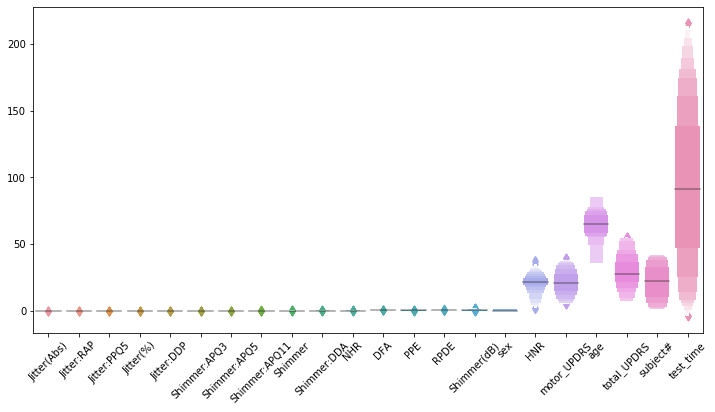

In [5]:
# We visualize the distribution of the variables, ordered depending the variance they have
fig = plt.figure(figsize=(12,6))
order = df.std().sort_values().index
chart = sns.lvplot(data=df, order=order, scale="linear")
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
plt.show()
# https://seaborn.pydata.org/examples/index.html


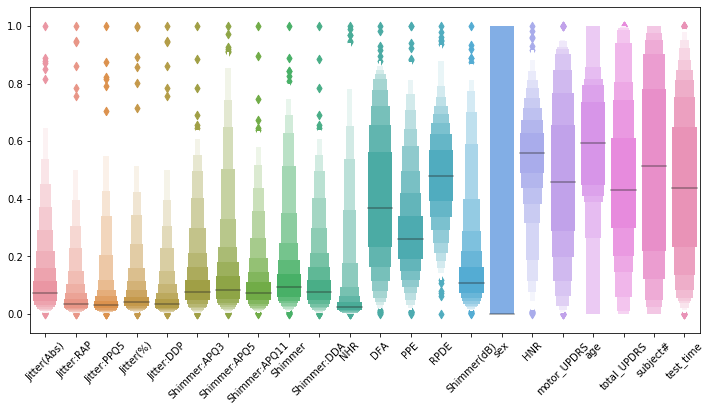

In [6]:
# We scale variables for improved viaulization
df_sca = df - df.min()
df_sca /= df_sca.max()
fig = plt.figure(figsize=(12,6))
chart = sns.lvplot(data=df_sca, order=order, scale="linear")
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
plt.show()

In [14]:
# From the data, we select the response variable that we are going to model
# It is the total_UPDRS score
target = (data[:,5].reshape([len(data), 1])-np.min(data[:, 5]))/np.max(data[:, 6:22])

# The 16 variables that measure the voice will be used as features. 
features = (data[:,6:22]-np.min(data[:, 6:22], axis=0))/np.max(data[:, 6:22], axis=0)
print(target)
print(features)

[[0.00000000e+00]
 [1.54507507e-02]
 [3.08703508e-02]
 [4.39847985e-02]
 [6.15849480e-02]
 [7.70045480e-02]
 [9.23618466e-02]
 [1.07750296e-01]
 [1.23201047e-01]
 [1.38651797e-01]
 [1.53946795e-01]
 [1.69335244e-01]
 [1.87340353e-01]
 [2.06716092e-01]
 [2.26122983e-01]
 [2.45529874e-01]
 [2.64967915e-01]
 [2.84281353e-01]
 [3.03657093e-01]
 [3.25929849e-01]
 [3.42408573e-01]
 [3.61815463e-01]
 [3.81191203e-01]
 [4.22777397e-01]
 [0.00000000e+00]
 [1.54507507e-02]
 [3.08703508e-02]
 [4.39847985e-02]
 [6.15849480e-02]
 [7.70045480e-02]
 [9.23618466e-02]
 [1.07750296e-01]
 [1.23201047e-01]
 [1.38651797e-01]
 [1.53946795e-01]
 [1.69335244e-01]
 [1.87340353e-01]
 [2.06716092e-01]
 [2.26122983e-01]
 [2.45529874e-01]
 [2.64967915e-01]
 [2.84281353e-01]
 [3.03657093e-01]
 [3.25929849e-01]
 [3.42408573e-01]
 [3.61815463e-01]
 [3.81191203e-01]
 [4.00566943e-01]
 [4.22777397e-01]
 [0.00000000e+00]
 [1.54507507e-02]
 [3.08703508e-02]
 [4.39847985e-02]
 [6.15849480e-02]
 [7.70045480e-02]
 [9.236184

We divide the dataset for the first subject in training and test data. Even rows are in the train set and odd rows in the test set. 




In [15]:

# Train set 
train_features = features[::2,:]
train_target = target[::2]
train_n_samples = train_features.shape[0]

# Test set
test_features = features[1::2,:]
test_target = target[1::2]
test_n_samples = test_features.shape[0]


In the first analysis we will use only one feature to model the response variable
We select the "best predictor" among the 16 voice features.


In [65]:
# The SelectKBest function from scikit-learn, with the f_regression metric, is used for feature selection
feature_selector = SelectKBest(f_regression, k=1)
feature_selector.fit(train_features, train_target)

# We print which is the selected feature
print(feature_selector.get_support(), ",", df.columns[6:22][feature_selector.get_support()][0])

[False False False False False False False False False False False False
 False  True False False] , RPDE


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We plot the feature and the response variable to inspect the relationship between the two variables visually


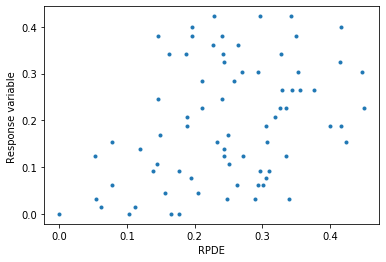

In [68]:
train_sel_feature = feature_selector.transform(train_features)
test_sel_feature = feature_selector.transform(test_features)

plt.plot(train_sel_feature,train_target,'.')
plt.xlabel(df.columns[6:22][feature_selector.get_support()][0])
plt.ylabel('Response variable ')
plt.show()

We firstly are going to fit a linear model with that single variable. Next, we try to predict the target value with that model for the test set.

In [18]:
lr = LinearRegression()
lr.fit(train_sel_feature, train_target)
lr_test_target = lr.predict(test_sel_feature)

We plot the prediction

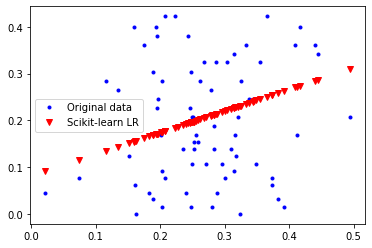

In [19]:
plt.plot(test_sel_feature, test_target, 'b.', label='Original data')
plt.plot(test_sel_feature, lr_test_target,'vr', label='Scikit-learn LR') 
plt.legend()
plt.show()

In [20]:
gpr = GaussianProcessRegressor()
gpr.fit(train_sel_feature, train_target)
gpr_test_target = gpr.predict(test_sel_feature)

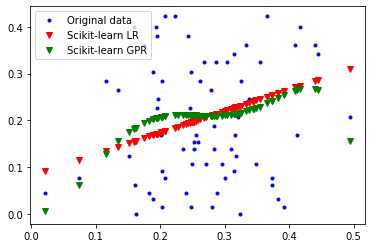

In [21]:
plt.plot(test_sel_feature, test_target, 'b.', label='Original data')
plt.plot(test_sel_feature, lr_test_target,'vr', label='Scikit-learn LR') 
plt.plot(test_sel_feature, gpr_test_target,'vg', label='Scikit-learn GPR') 
plt.legend()
plt.show()

# Using tensorflow to learn a linear regression model

The following instruction clears the whole tensorflow graph. We advise you to, when working on jupyter notebook, reset the tensorflow graph and run all the tf element declarations from the beginning each time you start with a new exercise. Otherwise, some garbage could be left in the graph, or it could be incomplete.

Check the tensorflow documentation for information: https://www.tensorflow.org/versions/r1.15/api_docs/python/tf?hl=es-419

In [22]:
tf.reset_default_graph()

We will use tensorflow to learn a linear regression model similar to the one learned using scikit-learn (y = Wx + b)

In [23]:
# We set the constant operators that will store the values of the 
# feature and response variable

X = tf.placeholder("float")
Y = tf.placeholder("float")

In [24]:
# The weights and bias are defined as variables. Notice that the definition is
# different to the one used above for the features and the target variable
# W and b will be initialized to zero.  By default, Variables are trainable.

W = tf.Variable(0.0, name="weight")
b = tf.Variable(0.0, name="bias")

In [25]:
# We define the linear model y = wx+b
# Notice that there is only one reponse variable and only one weight 

predicted = tf.add(tf.multiply(X, W), b)

In [26]:
# The loss function to use will be the mean squared error
loss = tf.reduce_sum(tf.pow(predicted-Y, 2))/(train_n_samples)

In [27]:
# We define the parameters of the learning process 
learning_rate = 0.05

In [28]:
# The optimizer is the gradient descent
# It uses as input parameter the learning rate and the loss function
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [29]:
# Before starting the tensorflow session we need to initialize the parameters
# We init tensorflow variables

#gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.3)
init = tf.global_variables_initializer()

# Number of iterations for the learning algorithm
training_epochs = 1000
# Using the training loop in the cell below, we will get updates about how the training is evolving each 50 steps
display_step = 50
# We shuffle the training data, in case it is ordered by any criterium. This could be harmful for some training steps
perm = np.random.permutation(train_n_samples)


There are three classes of gradient descent methods (We will cover these in the future)

- Batch gradient descent

- Stochastic gradient descent 

- Mini-batch gradient descent 


Below there is an example of Mini-batch gradient descent implemented with the classical gradient decent minimizer method.

After the model has been learned we plot the predictions in the test set. Uncomment the line where the prediction for the scikit-learn model is plotted in order to compare the prediction of the two algorithms. 

Epoch: 0050 cost= 0.032810263 W= 0.01732844 b= 0.061813366
Epoch: 0100 cost= 0.023231145 W= 0.029266123 b= 0.10277413
Epoch: 0150 cost= 0.019034477 W= 0.037483342 b= 0.12960836
Epoch: 0200 cost= 0.017144747 W= 0.043569967 b= 0.1475307
Epoch: 0250 cost= 0.016317884 W= 0.048008718 b= 0.15905854
Epoch: 0300 cost= 0.015925402 W= 0.051634297 b= 0.1669806
Epoch: 0350 cost= 0.015743870 W= 0.054648343 b= 0.17219011
Epoch: 0400 cost= 0.015661562 W= 0.056952156 b= 0.17546263
Epoch: 0450 cost= 0.015621453 W= 0.058920562 b= 0.17730081
Epoch: 0500 cost= 0.015593739 W= 0.060877208 b= 0.17876503
Epoch: 0550 cost= 0.015576730 W= 0.062587745 b= 0.17935888
Epoch: 0600 cost= 0.015561868 W= 0.06429644 b= 0.17995693
Epoch: 0650 cost= 0.015548697 W= 0.06601334 b= 0.18033898
Epoch: 0700 cost= 0.015536992 W= 0.06739498 b= 0.17938107
Epoch: 0750 cost= 0.015525793 W= 0.068804 b= 0.17916593
Epoch: 0800 cost= 0.015514851 W= 0.070170574 b= 0.17873053
Epoch: 0850 cost= 0.015503060 W= 0.071672395 b= 0.17855433
Epoch

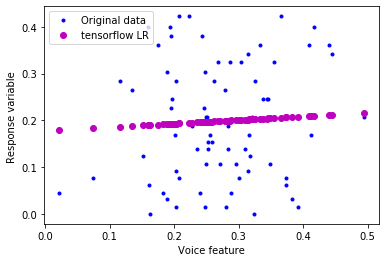

In [30]:
# Define the number of samples in each mini-batch
mini_batch_size = 6
# Compute the number of batches in the data
n_batch = train_n_samples // mini_batch_size + (train_n_samples % mini_batch_size != 0)
error = []

# Start training
with tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True)) as sess:

    # Run the initializer
    sess.run(init)

    # Fit the training data in the batches.
    for epoch in range(training_epochs):
        # We select the batch corresponding to the epoch at each iteration
        i_batch = (epoch % n_batch)*mini_batch_size
        batch = train_sel_feature[i_batch:i_batch+mini_batch_size], train_target[i_batch:i_batch+mini_batch_size]
        # The following instruction performs the actual weight optimization
        sess.run(optimizer, feed_dict={X: batch[0], Y: batch[1]})
        
        if (epoch+1) % display_step == 0:
            # The following instruction puts in "cost" the error given by the loss (in this case with the test set)
            c = sess.run(loss, feed_dict={X: train_sel_feature, Y: train_target})
            error.append(c)        
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c),  "W=", sess.run(W), "b=", sess.run(b))
                  
       
   
    training_loss = sess.run(loss, feed_dict={X: train_sel_feature , Y: train_target})
    print("Training loss=", training_loss, "W=", sess.run(W), "b=", sess.run(b), '\n')
   
    
    # Visualization of the prediction for the test data
    plt.plot(test_sel_feature, test_target, 'b.', label='Original data')
    plt.plot(test_sel_feature, sess.run(W) * test_sel_feature + sess.run(b),'om', label='tensorflow LR')
    #plt.plot(test_sel_feature,predicted_test_target,'vr', label='Scikit-learn LR')
    plt.xlabel('Voice feature')
    plt.ylabel('Response variable ')

    plt.legend()
    plt.show()
    
 

# Exercise 1 

a) Use tensorflow to learn the model y = a*x^2 + c*x + b where are a,b, and c are the parameters of a linear model. If you need operators aside from the ones that have already been introduced, check https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/math?hl=es-419

b) Train the model using two different stochastic gradient descent strategies (for example, Momentum optimizer)



### Define the required placeholders

In [69]:
tf.reset_default_graph()
# We set the constant operators that will store the values of the 
# feature and response variable

X = tf.placeholder("float")
Y = tf.placeholder("float")

### Define the variables

In [70]:
# The weights and bias are defined as variables. Notice that the definition is
# different to the one used above for the features and the target variable
# W and b will be initialized to zero.  By default, Variables are trainable.

a = tf.Variable(0.0, name="weight")
c = tf.Variable(0.0, name="weight")
b = tf.Variable(0.0, name="bias")

### Define the model

In [83]:
# We define the linear model y = wx+b
# Notice that there is only one reponse variable and only one weight 

predicted = tf.add(tf.add(tf.multiply(tf.pow(X, 0.5), a), tf.multiply(X, c)), b)

### Define the loss function

In [84]:
# The loss function to use will be the mean squared error
loss = tf.reduce_sum(tf.pow(predicted-Y, 2))/(train_n_samples)

In [85]:
# We define the parameters of the learning process 
learning_rate = 0.05

### Define the optimizer

In [86]:
# The optimizer is the gradient descent
# It uses as input parameter the learning rate and the loss function
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)


In [87]:
# Before starting the tensorflow session we need to initialize the parameters
# We init tensorflow variables

#gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.3)
init = tf.global_variables_initializer()

# Number of iterations for the learning algorithm
training_epochs = 1000
display_step = 50
perm = np.random.permutation(train_n_samples)


### Implement (copy and modify) the training loop

Epoch: 0050 cost= 0.029471958 a= 0.030996501 b= 0.059148356 c= 0.016599223
Epoch: 0100 cost= 0.020317195 a= 0.05007821 b= 0.09455857 c= 0.02696994
Epoch: 0150 cost= 0.016976127 a= 0.061901588 b= 0.11547113 c= 0.03349098
Epoch: 0200 cost= 0.015705794 a= 0.06972981 b= 0.12803143 c= 0.037976738
Epoch: 0250 cost= 0.015239320 a= 0.074787594 b= 0.13507554 c= 0.041010987
Epoch: 0300 cost= 0.015040614 a= 0.07858708 b= 0.13939656 c= 0.043431953
Epoch: 0350 cost= 0.014956090 a= 0.08147188 b= 0.14172982 c= 0.04540128
Epoch: 0400 cost= 0.014920594 a= 0.08337716 b= 0.14264812 c= 0.046806503
Epoch: 0450 cost= 0.014898516 a= 0.08492058 b= 0.14270586 c= 0.047997873
Epoch: 0500 cost= 0.014877453 a= 0.08662778 b= 0.14288943 c= 0.049304675
Epoch: 0550 cost= 0.014860891 a= 0.08795017 b= 0.14239098 c= 0.050399352
Epoch: 0600 cost= 0.014844835 a= 0.08939161 b= 0.14213793 c= 0.05155434
Epoch: 0650 cost= 0.014829312 a= 0.09086336 b= 0.14182545 c= 0.05274891
Epoch: 0700 cost= 0.014812481 a= 0.09165458 b= 0.140

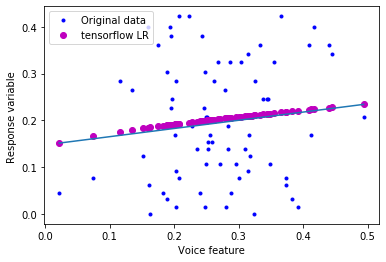

In [90]:
mini_batch_size = 6
n_batch = train_n_samples // mini_batch_size + (train_n_samples % mini_batch_size != 0)
error = []

# Start training
with tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True)) as sess:

    # Run the initializer
    sess.run(init)

    # Fit the training data in the batches.
    for epoch in range(training_epochs):
        # We select the batch corresponding to the epoch at each iteration
        i_batch = (epoch % n_batch)*mini_batch_size
        batch = train_sel_feature[i_batch:i_batch+mini_batch_size], train_target[i_batch:i_batch+mini_batch_size]
        # The following instruction performs the actual weight optimization
        sess.run(optimizer, feed_dict={X: batch[0], Y: batch[1]})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            # The following instruction puts in "cost" the error given by the loss (in this case with the test set)
            cost = sess.run(loss, feed_dict={X: train_sel_feature, Y: train_target})
            error.append(cost)        
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(cost),  "a=", sess.run(a), "b=", sess.run(b), "c=", sess.run(c))
                  
       
   
    training_loss = sess.run(loss, feed_dict={X: train_sel_feature , Y: train_target})
    print("Training loss=", training_loss, "a=", sess.run(a), "b=", sess.run(b), "c=", sess.run(c), '\n')
   
    
    # Visualization of the prediction for the test data
    plt.plot(test_sel_feature, test_target, 'b.', label='Original data')
    # prediction = sess.run(a) * test_sel_feature ** 2 + sess.run(c) * test_sel_feature + sess.run(b)
    prediction = sess.run(predicted, feed_dict={X: test_sel_feature})
    plt.plot(test_sel_feature, prediction,'om', label='tensorflow LR')
    plt.plot([np.min(test_sel_feature), np.max(test_sel_feature)], [prediction[np.argmin(test_sel_feature)], prediction[np.argmax(test_sel_feature)]])
    #plt.plot(test_sel_feature,predicted_test_target,'vr', label='Scikit-learn LR')
    plt.xlabel('Voice feature')
    plt.ylabel('Response variable ')

    plt.legend()
    plt.show()
    
 

# Exercise 2

Use tensorflow to learn the model y = ax + c*z + b where are a,b, and c are the parameters of a linear model and x and z are the two most informative features among the 16 variables.

a) Select the two most informative variables

b) Design the y = ax + c*z + b model

### Answer 2 a)

In [39]:
# The SelectKBest function from scikit-learn, with the f_regression metric, is used for feature selection
feature_selector = SelectKBest(f_regression, k=2)
feature_selector.fit(train_features, train_target)

# We print which is the selected feature
print(feature_selector.get_support(), ",", df.columns[6:22][feature_selector.get_support()])

[False False False False False False False False False False False False
 False  True  True False] , Index(['RPDE', 'DFA'], dtype='object')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(75, 2)


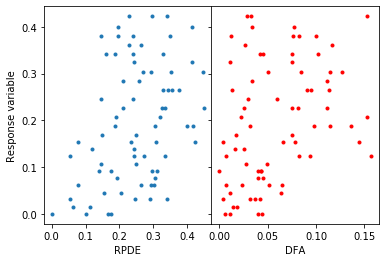

In [40]:
f, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, gridspec_kw={"wspace": 0})
train_sel_feature = feature_selector.transform(train_features)
print(train_sel_feature.shape)
test_sel_feature = feature_selector.transform(test_features)
ax1.plot(train_sel_feature[:, 0], train_target,'.')
ax1.set_ylabel('Response variable')
ax1.set_xlabel(df.columns[6:22][feature_selector.get_support()][0])
ax2.plot(train_sel_feature[:, 1], train_target,'.', c="r")
ax2.set_xlabel(df.columns[6:22][feature_selector.get_support()][1])
plt.show()

### Answer 2 b)

In [41]:
tf.reset_default_graph()
# We set the constant operators that will store the values of the 
# feature and response variable

X = tf.placeholder("float")
Z = tf.placeholder("float")
Y = tf.placeholder("float")

# The weights and bias are defined as variables. Notice that the definition is
# different to the one used above for the features and the target variable
# W and b will be initialized to zero.  By default, Variables are trainable.

a = tf.Variable(0.0, name="weight")
c = tf.Variable(0.0, name="weight")
b = tf.Variable(0.0, name="bias")

# We define the linear model y = ax + c*z + b
# Notice that there is only one reponse variable, two weights, and a single bias value 

predicted = tf.add(tf.add(tf.multiply(X, a), tf.multiply(Z, c)), b)

# The loss function to use will be the mean squared error
loss = tf.reduce_sum(tf.pow(predicted-Y, 2))/(train_n_samples)

# We define the parameters of the learning process 
learning_rate = 0.05

# The optimizer is the gradient descent
# It uses as input parameter the learning rate and the loss function
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Number of iterations for the learning algorithm and other parameters
training_epochs = 1000
display_step = 50
perm = np.random.permutation(train_n_samples)
mini_batch_size = 6
n_batch = train_n_samples // mini_batch_size + (train_n_samples % mini_batch_size != 0)
error = []

Epoch: 0050 cost= 1.239066839 a= 0.04477194 b= 0.16471852 c= 0.01228089
Epoch: 0100 cost= 1.213534117 a= 0.049835928 b= 0.17734201 c= 0.0146510815
Epoch: 0150 cost= 1.214239955 a= 0.051195 b= 0.17626186 c= 0.016072264
Epoch: 0200 cost= 1.214142799 a= 0.053079486 b= 0.17604592 c= 0.017460046
Epoch: 0250 cost= 1.215986371 a= 0.05391716 b= 0.17399777 c= 0.018651916
Epoch: 0300 cost= 1.214914203 a= 0.055495426 b= 0.1747462 c= 0.020013552
Epoch: 0350 cost= 1.212759614 a= 0.05819682 b= 0.17775942 c= 0.02189878
Epoch: 0400 cost= 1.212833285 a= 0.059705585 b= 0.17763959 c= 0.023360558
Epoch: 0450 cost= 1.213518739 a= 0.06096955 b= 0.17597409 c= 0.024793943
Epoch: 0500 cost= 1.213179946 a= 0.06269369 b= 0.17687279 c= 0.026238594
Epoch: 0550 cost= 1.213639855 a= 0.063815095 b= 0.17566921 c= 0.027483495
Epoch: 0600 cost= 1.213404417 a= 0.06506801 b= 0.17654781 c= 0.028672764
Epoch: 0650 cost= 1.213453174 a= 0.06665872 b= 0.17764543 c= 0.030174507
Epoch: 0700 cost= 1.214459538 a= 0.06734295 b= 0.1

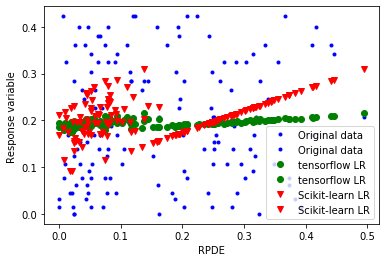

In [42]:
# Before starting the tensorflow session we need to initialize the parameters
# We init tensorflow variables

#gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.3)
init = tf.global_variables_initializer()


# Start training
with tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True)) as sess:

    # Run the initializer
    sess.run(init)

    # Fit the training data in the batches.
    for epoch in range(training_epochs):
        i_batch = (epoch % n_batch)*mini_batch_size
        batch = train_sel_feature[i_batch:i_batch+mini_batch_size, 0], train_sel_feature[i_batch:i_batch+mini_batch_size, 1], train_target[i_batch:i_batch+mini_batch_size]
        sess.run(optimizer, feed_dict={X: batch[0], Z: batch[1], Y: batch[2]})
        
        #for (x, y) in zip(train_sel_feature[perm,:], train_target[perm]):
        #    sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            cost = sess.run(loss, feed_dict={X: train_sel_feature[:, 0], Z: train_sel_feature[:, 1], Y: train_target})
            error.append(cost)        
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(cost),  "a=", sess.run(a), "b=", sess.run(b), "c=", sess.run(c))
                  
       
   
    training_loss = sess.run(loss, feed_dict={X: train_sel_feature[:, 0], Z: train_sel_feature[:, 1], Y: train_target})
    print("Training loss=", training_loss, "a=", sess.run(a), "b=", sess.run(b), "c=", sess.run(c), '\n')
   
    
    # Visualization of the prediction for the test data
    tf_pred = sess.run(a) * test_sel_feature[:, 0] + sess.run(c) * test_sel_feature[:, 1] + sess.run(b)
plt.plot(test_sel_feature, test_target, 'b.', label='Original data')
plt.plot(test_sel_feature, tf_pred,'og', label='tensorflow LR')
plt.plot(test_sel_feature, lr_test_target,'vr', label='Scikit-learn LR')
plt.xlabel(df.columns[6:22][feature_selector.get_support()][0])
plt.ylabel('Response variable ')

plt.legend()
plt.show()
    

b) Try training the model using the batch gradient decent and the Adam optimizer.


In [39]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

Epoch: 0050 cost= 97527.234375000 a= 2.3895614 b= 2.4130971 c= 2.4027598
Epoch: 0100 cost= 74637.148437500 a= 4.627759 b= 4.671977 c= 4.653882
Epoch: 0150 cost= 56169.195312500 a= 6.705084 b= 6.769316 c= 6.744057
Epoch: 0200 cost= 41553.535156250 a= 8.615365 b= 8.697626 c= 8.665917
Epoch: 0250 cost= 30223.343750000 a= 10.352842 b= 10.452365 c= 10.414978
Epoch: 0300 cost= 21633.298828125 a= 11.915298 b= 12.031114 c= 11.988778
Epoch: 0350 cost= 15276.933593750 a= 13.3021 b= 13.433611 c= 13.38682
Epoch: 0400 cost= 10704.624023438 a= 14.511769 b= 14.659389 c= 14.608179
Epoch: 0450 cost= 7488.828613281 a= 15.554751 b= 15.72 c= 15.664007
Epoch: 0500 cost= 5287.547851562 a= 16.441158 b= 16.624598 c= 16.56374
Epoch: 0550 cost= 3824.903808594 a= 17.181475 b= 17.383303 c= 17.317791
Epoch: 0600 cost= 2879.994873047 a= 17.789528 b= 18.010296 c= 17.940325
Epoch: 0650 cost= 2288.153808594 a= 18.279072 b= 18.519274 c= 18.444975
Epoch: 0700 cost= 1929.272949219 a= 18.663757 b= 18.924162 c= 18.845463
E

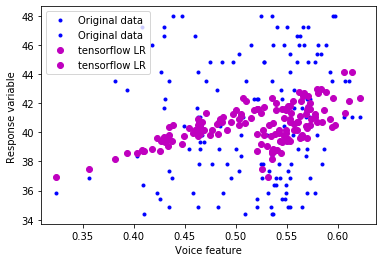

In [40]:
# Before starting the tensorflow session we need to initialize the parameters
# We init tensorflow variables

#gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.3)
init = tf.global_variables_initializer()


# Start training
with tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True)) as sess:

    # Run the initializer
    sess.run(init)

    # Fit the training data in the batches.
    for epoch in range(training_epochs):
        i_batch = (epoch % n_batch)*mini_batch_size
        batch = train_sel_feature[i_batch:i_batch+mini_batch_size, 0], train_sel_feature[i_batch:i_batch+mini_batch_size, 1], train_target[i_batch:i_batch+mini_batch_size]
        sess.run(optimizer, feed_dict={X: batch[0], Z: batch[1], Y: batch[2]})
        
        #for (x, y) in zip(train_sel_feature[perm,:], train_target[perm]):
        #    sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            cost = sess.run(loss, feed_dict={X: train_sel_feature[:, 0], Z: train_sel_feature[:, 1], Y: train_target})
            error.append(cost)        
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(cost),  "a=", sess.run(a), "b=", sess.run(b), "c=", sess.run(c))
                  
       
   
    training_loss = sess.run(loss, feed_dict={X: train_sel_feature[:, 0], Z: train_sel_feature[:, 1], Y: train_target})
    print("Training loss=", training_loss, "a=", sess.run(a), "b=", sess.run(b), "c=", sess.run(c), '\n')
   
    
    # Visualization of the prediction for the test data
    plt.plot(test_sel_feature, test_target, 'b.', label='Original data')
    plt.plot(test_sel_feature, sess.run(a) * test_sel_feature[:, 0] + sess.run(c) * test_sel_feature[:, 1] + sess.run(b),'om', label='tensorflow LR')
    #plt.plot(test_sel_feature,predicted_test_target,'vr', label='Scikit-learn LR')
    plt.xlabel('Voice feature')
    plt.ylabel('Response variable ')

    plt.legend()
    plt.show()
    

# Learning the parameters of a Logistic Regression Classifier with tensorflow

We will consider now a classification problem with 16 features


For this problem we will learn the parameters of a logistic regression classifier

In [41]:
# As a first step we create the class variable (label)
# binarizing the response variable we had used for regression
label = (target>np.mean(target)).astype("int")
label = (label).astype("int")

In [42]:
# The class variable is split into train and test sets
train_label = label[::2]
test_label = label[1::2]

We define the variables and constants of the tensorflow session.

In [43]:
tf.reset_default_graph()


# The input will be a matrix with 16 columns (one for each feature)
x = tf.placeholder(tf.float32, [None, 16])

# Class binary variable
t = tf.placeholder(tf.float32, [None, 1])

# There will be 16 weights, one corresponding to each feature 
w = tf.Variable(tf.zeros([16, 1]))

# This is the intersect, usually also denoted as b
b = tf.Variable(tf.zeros([1]))


We define the elements of the logistic regression model

In [44]:
# Linear model, matrix multiplication of the variables and the weight
linear_model = tf.matmul(x, w) + b

# The probability is computed combining the linear model and the sigmoid function
LR_prob = tf.sigmoid(linear_model)

We defined the loss function and the accuracy measures used to evaluate the classifier

In [45]:
# The loss function will be maximum likelihood estimation for the logistic regression model

loss = -tf.reduce_sum(t*tf.log(LR_prob) + (1-t)*tf.log(1-LR_prob))

In [46]:
# We will find the parameters of the model (the weights)
# by minimizing the loglikelihood with the AdapOptimizer

train_step = tf.train.AdamOptimizer().minimize(loss)

In [47]:
# Whether, for a given instance, the prediction is correct
correct_prediction = tf.equal(tf.sign(LR_prob-0.5), tf.sign(t-0.5))

# The accuracy, number of correct predictions divided by the number of examples
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [48]:
#gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.3)
#sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True))

# Initialization of the global variables
init = tf.global_variables_initializer()

In [49]:
sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True))
sess.run(init)
i = 0
for _ in range(20000):
    i += 1
    sess.run(train_step, feed_dict={x:train_features, t:train_label})
    if i % 500 == 0:
        loss_val, acc_val = sess.run(
            [loss, accuracy], feed_dict={x:test_features, t:test_label})
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))

Step: 500, Loss: 51.611843, Accuracy: 0.445946
Step: 1000, Loss: 51.259388, Accuracy: 0.554054
Step: 1500, Loss: 50.801643, Accuracy: 0.527027
Step: 2000, Loss: 50.394497, Accuracy: 0.554054
Step: 2500, Loss: 50.044067, Accuracy: 0.567568
Step: 3000, Loss: 49.742302, Accuracy: 0.567568
Step: 3500, Loss: 49.479298, Accuracy: 0.581081
Step: 4000, Loss: 49.244823, Accuracy: 0.594595
Step: 4500, Loss: 49.030731, Accuracy: 0.581081
Step: 5000, Loss: 48.832451, Accuracy: 0.581081
Step: 5500, Loss: 48.648277, Accuracy: 0.581081
Step: 6000, Loss: 48.477177, Accuracy: 0.581081
Step: 6500, Loss: 48.320698, Accuracy: 0.581081
Step: 7000, Loss: 48.177738, Accuracy: 0.594595
Step: 7500, Loss: 48.049301, Accuracy: 0.594595
Step: 8000, Loss: 47.937199, Accuracy: 0.635135
Step: 8500, Loss: 47.838673, Accuracy: 0.635135
Step: 9000, Loss: 47.757927, Accuracy: 0.635135
Step: 9500, Loss: 47.694359, Accuracy: 0.648649
Step: 10000, Loss: 47.648125, Accuracy: 0.662162
Step: 10500, Loss: 47.618710, Accuracy: 

# Exercise 3

a) Use tensorflow to learn the linear regression  model y = WX + b where X is a vector of the 16 variables of
the problem (therefore this is a linear model of 16 variables). 

b) Train the model using the stochastic gradient decent and the Momentum classifier.

In [50]:
tf.reset_default_graph()


# The input will be a matrix with 16 columns (one for each feature)
x = tf.placeholder(tf.float32, [None, 16])

# The output, a single target value
y = tf.placeholder(tf.float32, [None, 1])

# There will be 16 weights, one corresponding to each feature 
w = tf.Variable(tf.zeros([16, 1]))

# This is the intersect, usually also denoted as b
b = tf.Variable(tf.zeros([1]))

# Linear model, matrix multiplication of the variables and the weight
linear_model = tf.matmul(x, w) + b

# The loss function to use will be the mean squared error
loss = tf.reduce_sum(tf.pow(linear_model-y, 2))/(train_n_samples)

# We define the parameters of the learning process 
learning_rate = 0.0001

# The optimizer is the gradient descent
# It uses as input parameter the learning rate and the loss function
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Before starting the tensorflow session we need to initialize the parameters
# We init tensorflow variables

#gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.3)
init = tf.global_variables_initializer()

# Number of iterations for the learning algorithm
training_epochs = 1000
display_step = 50
perm = np.random.permutation(train_n_samples)

mini_batch_size = 6
n_batch = train_n_samples // mini_batch_size + (train_n_samples % mini_batch_size != 0)
error = []

Epoch: 0050 cost= 615.117370605
Epoch: 0100 cost= 245.031311035
Epoch: 0150 cost= 114.775863647
Epoch: 0200 cost= 68.411018372
Epoch: 0250 cost= 52.283149719
Epoch: 0300 cost= 46.634979248
Epoch: 0350 cost= 44.589431763
Epoch: 0400 cost= 43.729995728
Epoch: 0450 cost= 43.464832306
Epoch: 0500 cost= 43.394123077
Epoch: 0550 cost= 43.356418610
Epoch: 0600 cost= 43.350139618
Epoch: 0650 cost= 43.354003906
Epoch: 0700 cost= 43.350925446
Epoch: 0750 cost= 43.342079163
Epoch: 0800 cost= 43.340476990
Epoch: 0850 cost= 43.338336945
Epoch: 0900 cost= 43.336444855
Epoch: 0950 cost= 43.336490631
Epoch: 1000 cost= 43.337196350
Training loss= 43.337196 



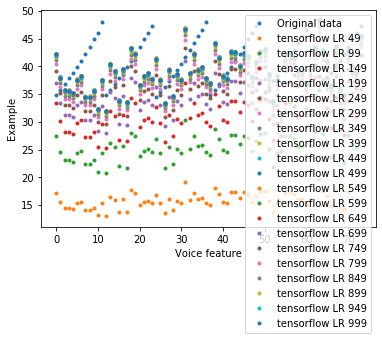

In [51]:
# Start training
plt.plot(test_target, '.', label='Original data')
with tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True)) as sess:

    # Run the initializer
    sess.run(init)

    # Fit the training data in the batches.
    for epoch in range(training_epochs):
        i_batch = (epoch % n_batch)*mini_batch_size
        batch = train_features[i_batch:i_batch+mini_batch_size], train_target[i_batch:i_batch+mini_batch_size]
        sess.run(optimizer, feed_dict={x: batch[0], y: batch[1]})
        #for (x, y) in zip(train_sel_feature[perm,:], train_target[perm]):
        #    sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            plt.plot(sess.run(linear_model, feed_dict={x: test_features}),'.', label='tensorflow LR ' + str(epoch))
            cost = sess.run(loss, feed_dict={x: train_features, y: train_target})
            error.append(cost)        
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(cost))
                  
       
   
    training_loss = sess.run(loss, feed_dict={x: train_features, y: train_target})
    print("Training loss=", training_loss, '\n') 
    
    # Visualization of the prediction for the test data
    #plt.plot(test_target, 'b.', label='Original data')
    #plt.plot(sess.run(linear_model, feed_dict={x: test_features}),'om', label='tensorflow LR')
    #plt.plot(test_sel_feature,predicted_test_target,'vr', label='Scikit-learn LR')
    plt.xlabel('Voice feature')
    plt.ylabel('Example')
    plt.legend()
    plt.show()

## More examples using different databases

We download the yacht_hydrodynamics dataset from https://archive.ics.uci.edu/ml/datasets/Yacht+Hydrodynamics

The goal of this dataset is the prediction of residuary resistance of sailing yachts from a number of features.  Essential inputs include the basic hull dimensions and the boat velocity. 

This can be approached as a regression pro blem

In [52]:

# https://archive.ics.uci.edu/ml/datasets/Yacht+Hydrodynamics
data = np.loadtxt('yacht_hydrodynamics.data')

# The Pandas dataframe is created
df = pd.DataFrame(data,columns=['Long. position', 'Prismatic coef.', 'LD ratio', 'BD ratio', 'LB ratio', 'Froude numb.', 'Resistance' ])


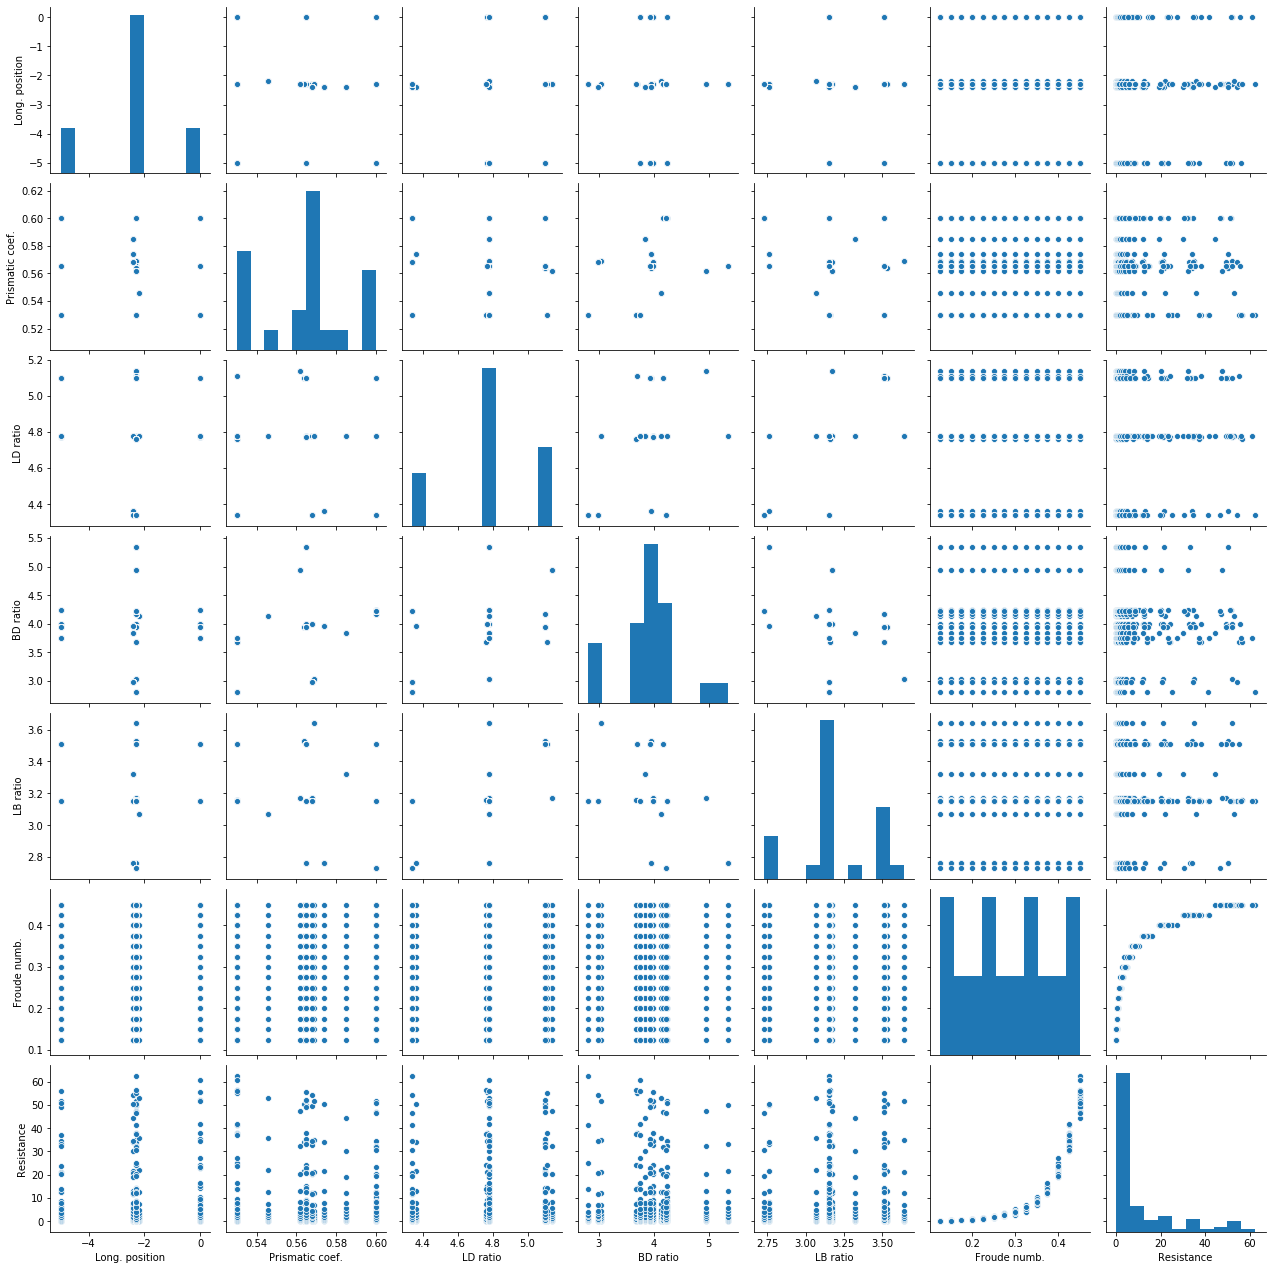

In [53]:
# Visualization of the dataset
sns.pairplot(df)
plt.show()

In [54]:
features = data[:,:6]
target = data[:,6]

# We split the data into two sets, training and test

train_features_yatch = features[::2,:]
train_target_yatch = target[::2]
train_n_samples_yatch = train_features.shape[0]

test_features_yatch = features[1::2,:]
test_target_yatch = target[1::2]
test_n_samples_yatch = test_features.shape[0]

feature_selector_yatch = SelectKBest(f_regression, k=1)
feature_selector_yatch.fit(train_features_yatch, train_target_yatch)

print(feature_selector_yatch.get_support())

train_sel_feature_yatch = feature_selector_yatch.transform(train_features_yatch)
test_sel_feature_yatch = feature_selector_yatch.transform(test_features_yatch)


[False False False False False  True]


# Exercise 5

a) Use tensorflow to learn the model y = wx + b where w is the parameter of a linear model of the  yacht_hydrodynamics dataset

b) Train the model using two different stochastic gradient descent methods and the Momentum optimizer



# Exercise 6

a) Download a database from the UCI repository which is intended for classification (https://archive.ics.uci.edu/ml/datasets.php?format=&task=cla&att=&area=&numAtt=&numIns=&type=mvar&sort=nameUp&view=table) and load it, as we have done before. Observe whether it needs any kind of preprocessing (e.g., missing data).

b) Identify the number of different classes in the data, and whether it is balanced. To this end, you can use the np.unique() function

c) Use tensorflow to learn the model *y = f(wx + b)*. You should choose the f function according to the number of classes in your data (https://www.tensorflow.org/api_docs/python/tf/math/sigmoid for binary problems or https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/nn/softmax?hl=es-419 if more classes are present)

d) Use a fitting loss function for the classification problem (e.g., https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits?hl=es-419 or https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/nn/softmax_cross_entropy_with_logits_v2?hl=es-419)

e) Train the model using two different stochastic gradient descent methods and the Momentum optimizer

f) Use an adequate metric, taking into account whether the data is balanced or not.

g) Print the confusion matrix